In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

**Business Problem**

Analyze the data and generate insights that could help OTT platform in deciding which type of shows/movies to produce and how they can grow the business in different countries



In [ ]:
df = pd.read_csv('/content/sample_data/top_ott_platform.txt')

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**<h4> Column date_added dtype object to datetime to extract more feature </h4>**
Data type of OTT Platform date add is object need to change it to datetime. <br>
Extracting Day, Month and Year column From OTT Platform add date

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
print(df['date_added'].dtypes)

datetime64[ns]


In [ ]:
df['day_added'] = df['date_added'].dt.strftime('%A')
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

**<h4> Preprocessing Data </h4>**

There is small portion of data missing in date_added, rating and durtion column so droping them is fine. but director, cast and country column have many entries missing. these column missng value can be replaced with method. for ex. to fill director column missing value can take mode of group of cast and director but it only fill few null and also can make dataset bias so here best way is to replace missing values is providing anonymous value. <br>
Also Duration column we will only take 1ast value that is season number for TV shows and length for movies.

In [ ]:
df.director.fillna("Anonymous", inplace=True)
df.cast.fillna("Anonymous", inplace=True)
df.country.fillna("Not Available", inplace=True)
df.dropna(subset=["date_added", "rating" , "duration"], inplace=True)

In [ ]:
def duration_change(data):
  val = data.split(' ')
  return int(val[0])
df['duration'] = df['duration'].apply(duration_change)

In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
day_added       False
month_added     False
year_added      False
dtype: bool

In [ ]:
df.describe(include="all")

<ipython-input-17-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
count,8790,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790.000000,8790,8790,8790,8790,8790.000000
unique,8790,2,8790,4527,7679,749,1713,NaN,14,NaN,513,8758,7,12,NaN
top,s1,Movie,Dick Johnson Is Dead,Anonymous,Anonymous,United States,2020-01-01 00:00:00,NaN,TV-MA,NaN,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",Friday,July,NaN
freq,1,6126,1,2621,825,2809,110,NaN,3205,NaN,362,4,2497,827,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,69.934471,NaN,NaN,NaN,NaN,2018.873606
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,50.794433,NaN,NaN,NaN,NaN,1.573568
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2018.000000


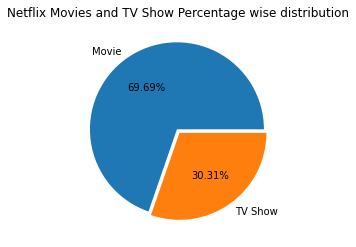

In [ ]:
plt.title('OTT Platform Movies and TV Show Percentage wise distribution')
plt.pie(df['type'].value_counts(),
          labels=df['type'].value_counts().index,
          autopct='%.2f%%',
          explode=(0.025,0.025))
plt.show()

There is 6000+ Movies and 2500+ TV Shows. Clearly mejority titles are of movies.

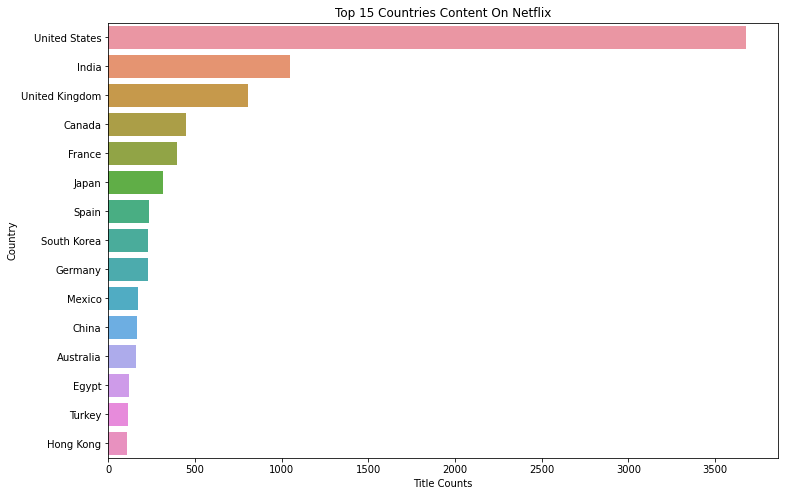

In [ ]:
df_countries = df.set_index('title')['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
df_countries = df_countries[df_countries != 'Not Available']
plt.figure(figsize=(12,8))
sns.countplot(y=df_countries, order=df_countries.value_counts().index[:15])
plt.title('Top 15 Countries Content On OTT Platform')
plt.xlabel('Title Counts')
plt.ylabel('Country')
plt.show()

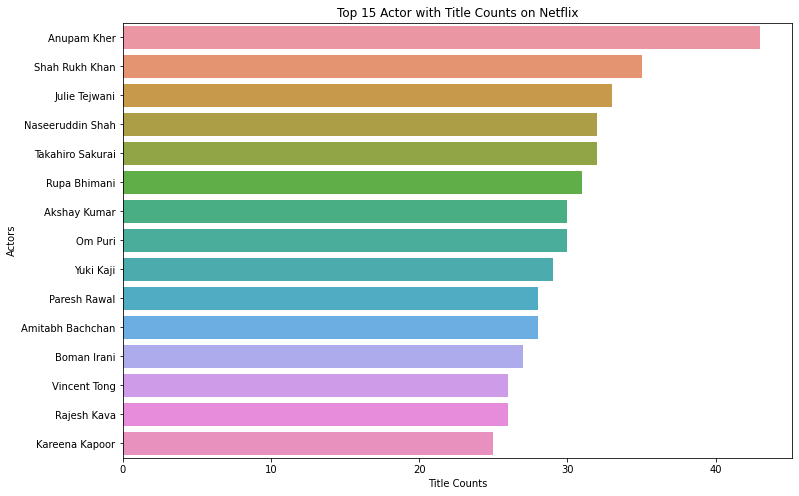

In [ ]:
df_cast = df.set_index('title')['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
df_cast = df_cast[df_cast != 'Anonymous']
plt.figure(figsize=(12,8))
sns.countplot(y=df_cast, order=df_cast.value_counts().index[:15])
plt.title('Top 15 Actor with Title Counts on OTT Platform')
plt.xlabel('Title Counts')
plt.ylabel('Actors')
plt.show()

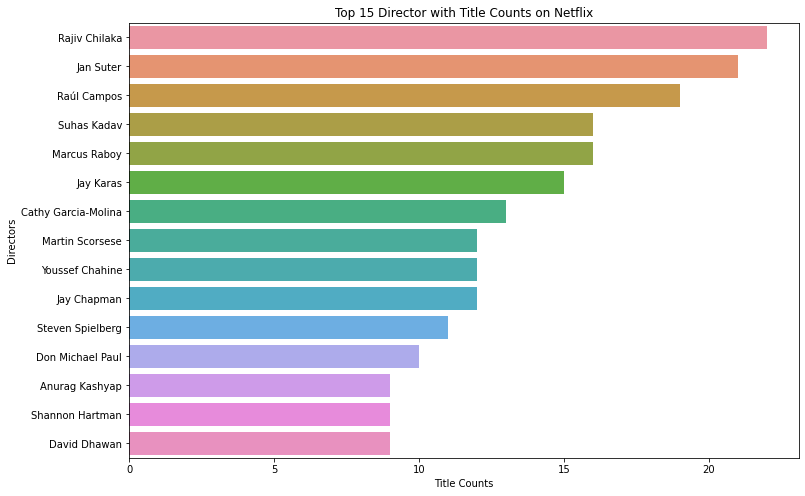

In [ ]:
df_director = df.set_index('title')['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
df_director = df_director[df_director != 'Anonymous']
plt.figure(figsize=(12,8))
sns.countplot(y=df_director, order=df_director.value_counts().index[:15])
plt.title('Top 15 Director with Title Counts on OTT Platform')
plt.xlabel('Title Counts')
plt.ylabel('Directors')
plt.show()

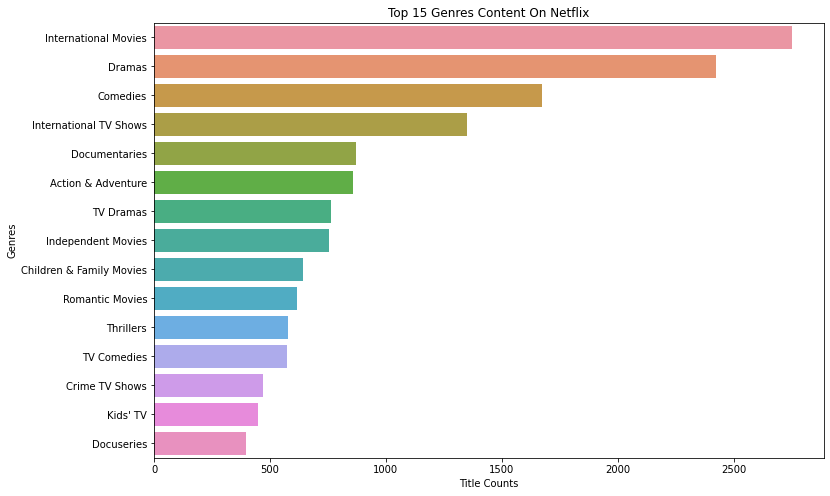

In [ ]:
df_genre = df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(12,8))
sns.countplot(y=df_genre, order=df_genre.value_counts().index[:15])
plt.title('Top 15 Genres Content On OTT Platform')
plt.xlabel('Title Counts')
plt.ylabel('Genres')
plt.show()

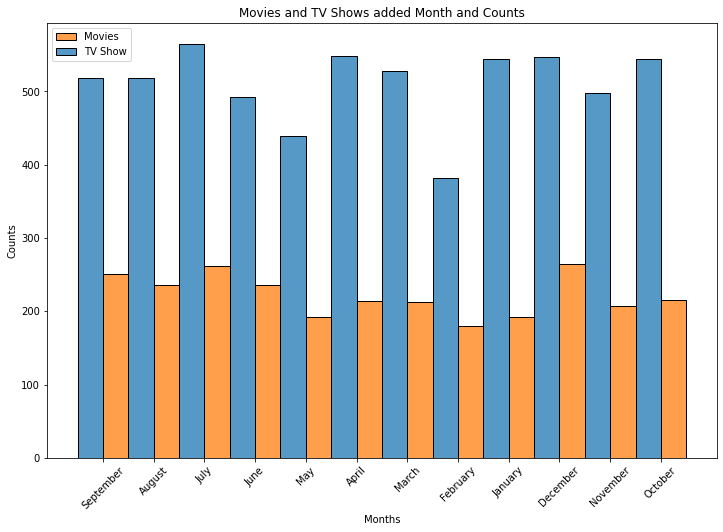

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="month_added", hue="type", multiple="dodge")
plt.title('Movies and TV Shows added Month and Counts')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(['Movies', 'TV Show'], loc='upper left')
plt.show()

From the plot we can conclude that February and May Month less liky to add a movie or tv show on platform

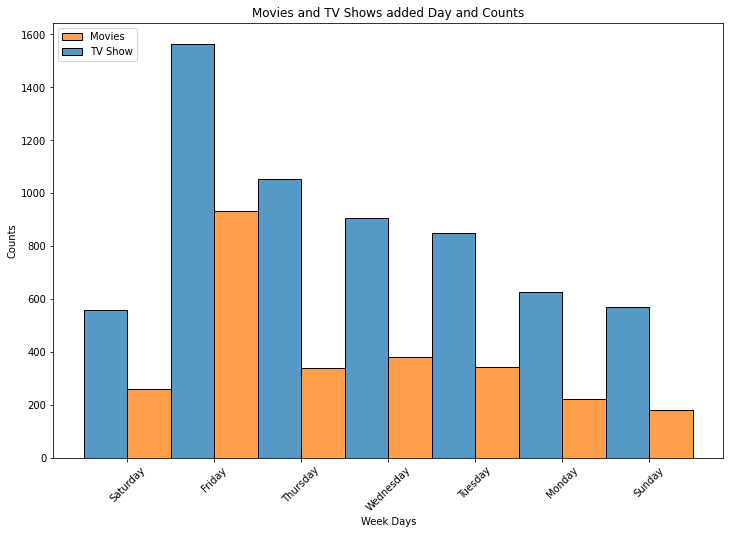

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="day_added", hue="type", multiple="dodge")
plt.title('Movies and TV Shows added Day and Counts')
plt.xlabel('Week Days')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(['Movies', 'TV Show'], loc='upper left')
plt.show()

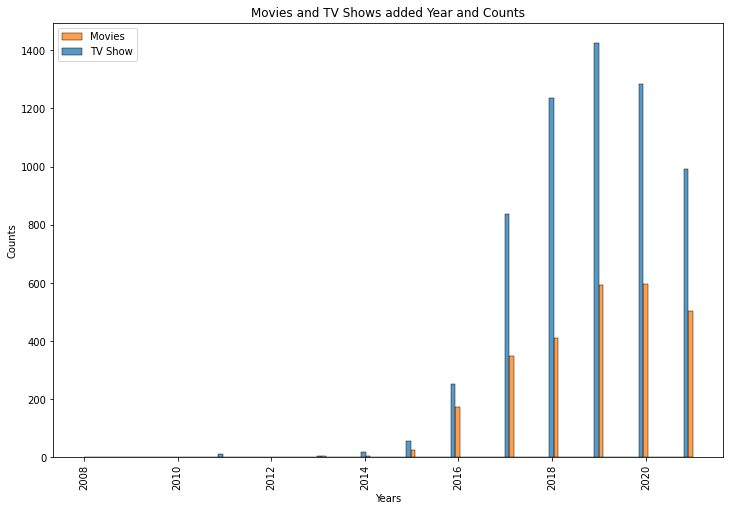

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="year_added", hue="type", multiple="dodge")
plt.title('Movies and TV Shows added Year and Counts')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.legend(['Movies', 'TV Show'], loc='upper left')
plt.xticks(rotation=90)
plt.show()

Most of the content on platform added after 2014 and afterwords plat have repidly extanded and on avarage content on platform have increased 5 times

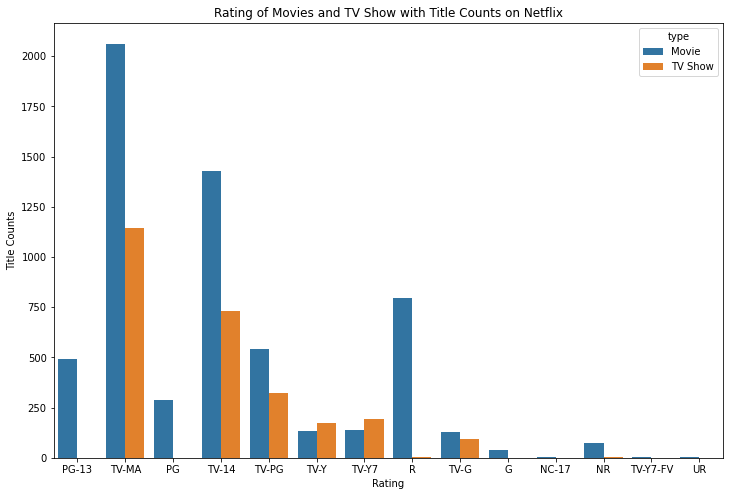

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='rating', hue='type')
plt.title('Rating of Movies and TV Show with Title Counts on OTT Platform')
plt.xlabel('Rating')
plt.ylabel('Title Counts')
plt.show()

Movies and TV Show both have significant portion content for mature audiances and after that highest number of both type content is mode for audiances age fourteen.

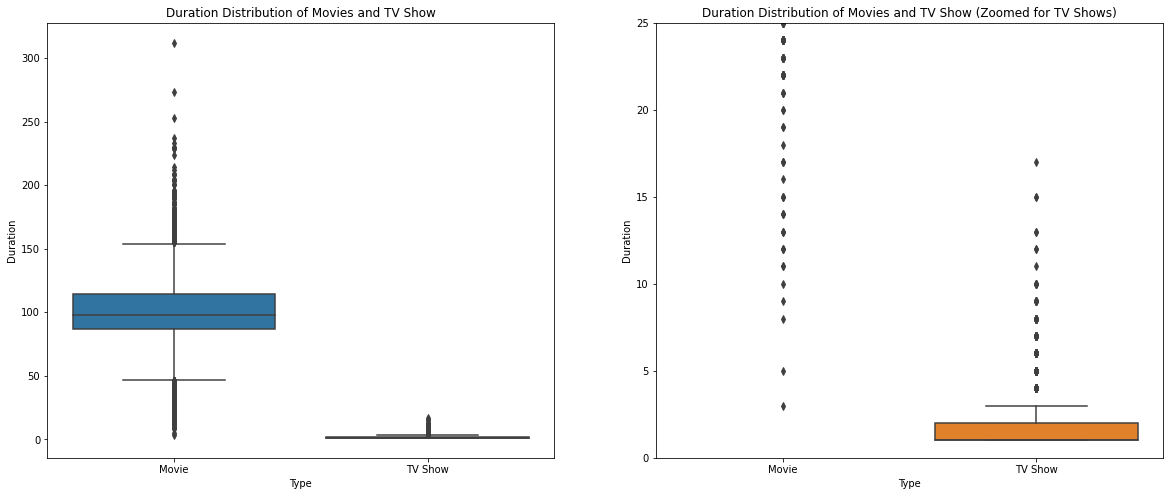

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df, x="type", y="duration")
plt.title('Duration Distribution of Movies and TV Show')
plt.xlabel('Type')
plt.ylabel('Duration')

plt.subplot(1,2,2)
sns.boxplot(data=df, x="type", y="duration")
plt.title('Duration Distribution of Movies and TV Show (Zoomed for TV Shows)')
plt.ylim(0,25)
plt.xlabel('Type')
plt.ylabel('Duration')

plt.show()

In Above Two Images we can cleary see that 50% of movies have duration of 100 minutes and TV shows with season count two. there are few movies with 200+ minutes duration and TV shows with 10+ seasons on platform

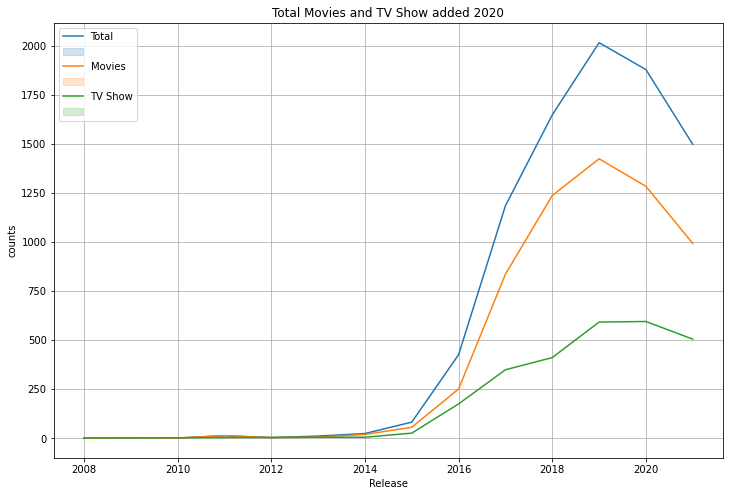

In [ ]:
plt.figure(figsize=(12,8))
movies = df[df['type'] == 'Movie']
TV = df[df['type'] == 'TV Show']
TV_added_date = TV['year_added'].value_counts().rename_axis('year').reset_index(name='counts')
Movie_added_date = movies['year_added'].value_counts().rename_axis('year').reset_index(name='counts')
all_added_date = df['year_added'].value_counts().rename_axis('year').reset_index(name='counts')

sns.lineplot(data=all_added_date, x='year', y='counts')
sns.lineplot(data=Movie_added_date, x='year', y='counts')
sns.lineplot(data=TV_added_date, x='year', y='counts')
plt.title('Total Movies and TV Show added 2020')
plt.legend(['Total','', 'Movies', '', 'TV Show', ''])
plt.xlabel('Years')
plt.xlabel('Release')
plt.grid()
plt.show()

Here we can see platform has rapid increase in both type of content (Movies and TV shows) from 2014. but OTT Platform is clearly focused more on movies as movies is far more then TV shows. <br> Also we can notice a slite drop in content adding after 2018. however drop in movies is more then TV shows

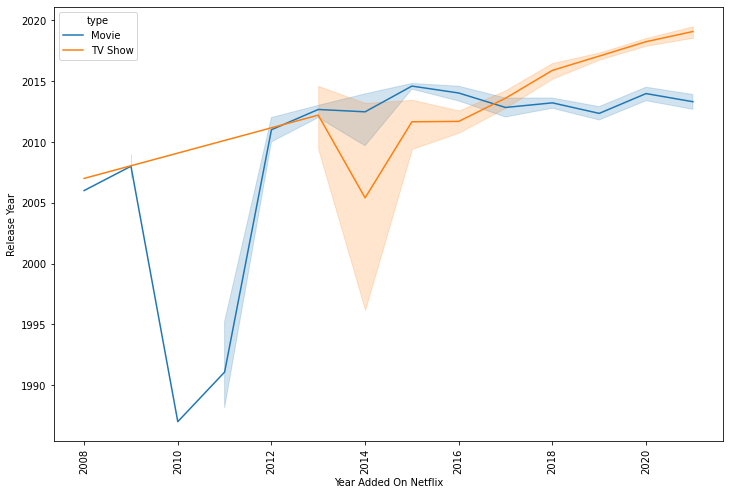

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='year_added', y='release_year', hue="type")
plt.xticks(rotation=90)
plt.title('')
plt.xlabel('Year Added On OTT Platform')
plt.ylabel('Release Year')
plt.show()

Most Content both type (Movies and TV Show) have been added to platform 4 to 5 year after release. In some case movie is released in far 1990 and added to OTT Platform in 2010. <br>
In recent year we can see TV shows added to OTT Platform same year of there release.

In [ ]:
df_genre = pd.DataFrame({'title': df_genre.index, 'genre': df_genre.values})
df_merge_genre = df.merge(df_genre, how="inner", on="title")
df_merge_genre = df_merge_genre[df_merge_genre['country'] != 'Not Available']

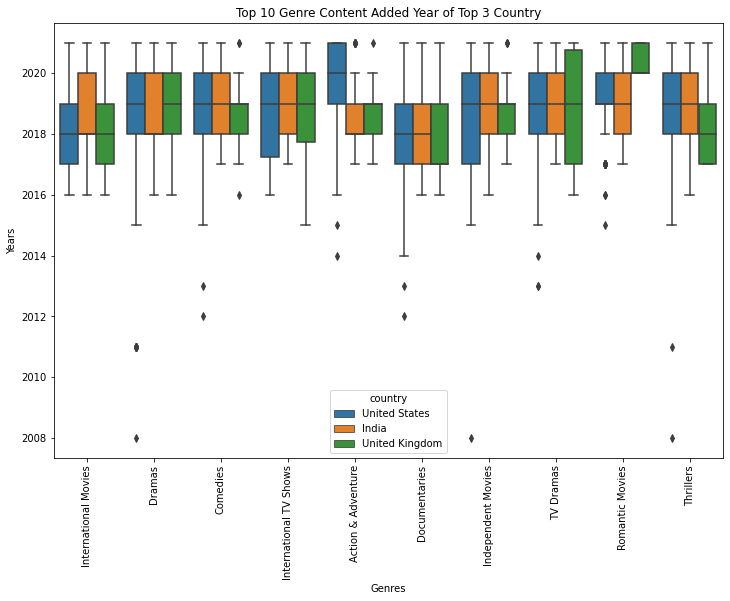

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_merge_genre, x='genre', y='year_added', hue="country", hue_order=df_merge_genre['country'].value_counts().index[:3], order=df_merge_genre['genre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Genre Content Added Year of Top 3 Country')
plt.xlabel('Genres')
plt.ylabel('Years')
plt.show()

Top 3 Countries as per title count have content in all top 10 genres. UK have fewer content on some genres

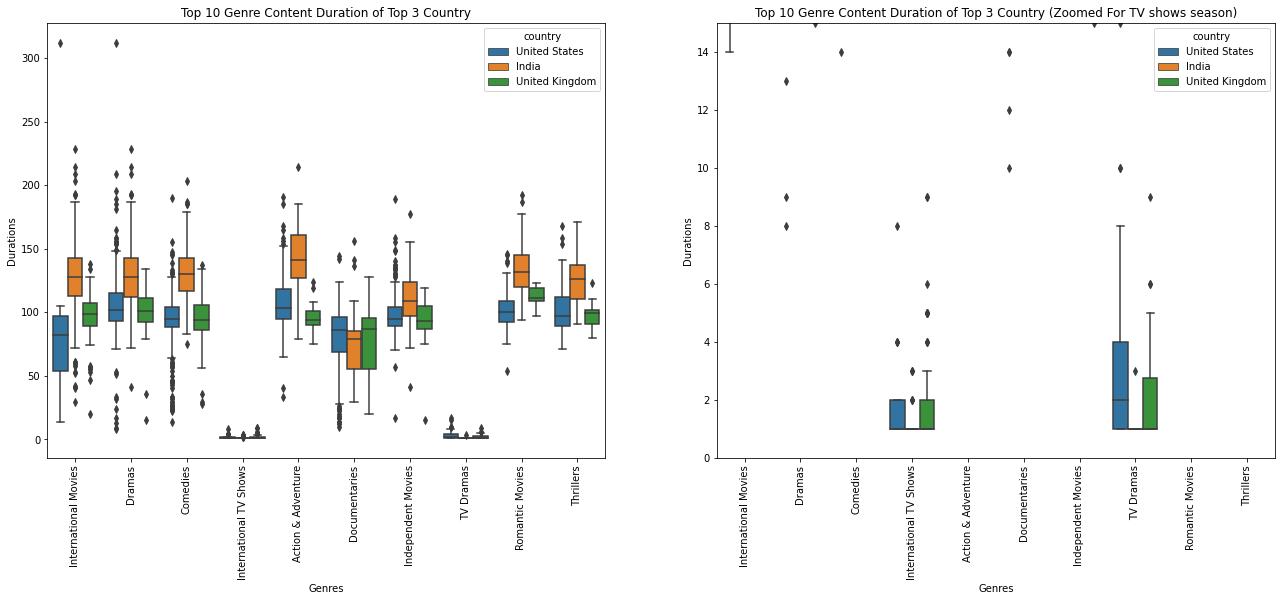

In [ ]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.boxplot(data=df_merge_genre, x='genre', y='duration', hue="country", hue_order=df_merge_genre['country'].value_counts().index[:3], order=df_merge_genre['genre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Genre Content Duration of Top 3 Country')
plt.xlabel('Genres')
plt.ylabel('Durations')

plt.subplot(1,2,2)
sns.boxplot(data=df_merge_genre, x='genre', y='duration', hue="country", hue_order=df_merge_genre['country'].value_counts().index[:3], order=df_merge_genre['genre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Genre Content Duration of Top 3 Country (Zoomed For TV shows season)')
plt.xlabel('Genres')
plt.ylabel('Durations')
plt.ylim(0,15)

plt.show()

Here its clearly visible that US and UK Movies Duration is approx 100 minutes where indian movies have rum time of 120 to 150 minutes. <br> Also india does not have any TV show for top 10 genre as per title count. Documentary movies duration is short in india campare to US and UK

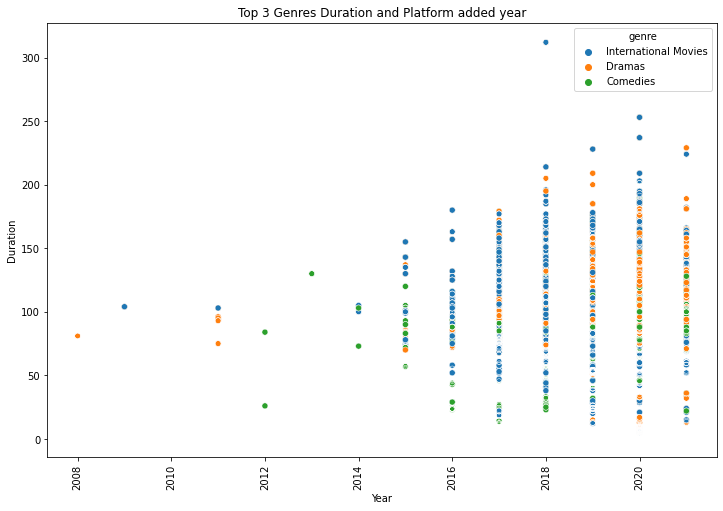

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_merge_genre, x='year_added', y='duration', hue="genre", hue_order=df_merge_genre['genre'].value_counts().index[:3])
plt.xticks(rotation=90)
plt.title('Top 3 Genres Duration and Platform added year')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

Before 2014 Most Content Availabe on platform is from Drama or Comedy genres and duration was less in 150 minutes.

In [ ]:
df_director = pd.DataFrame({'title': df_director.index, 'director': df_director.values})
df_merge_genre_director = df_merge_genre.merge(df_director, how="inner", on="title")
df_merge_genre_director = df_merge_genre_director[df_merge_genre_director['country'] != 'Not Available']

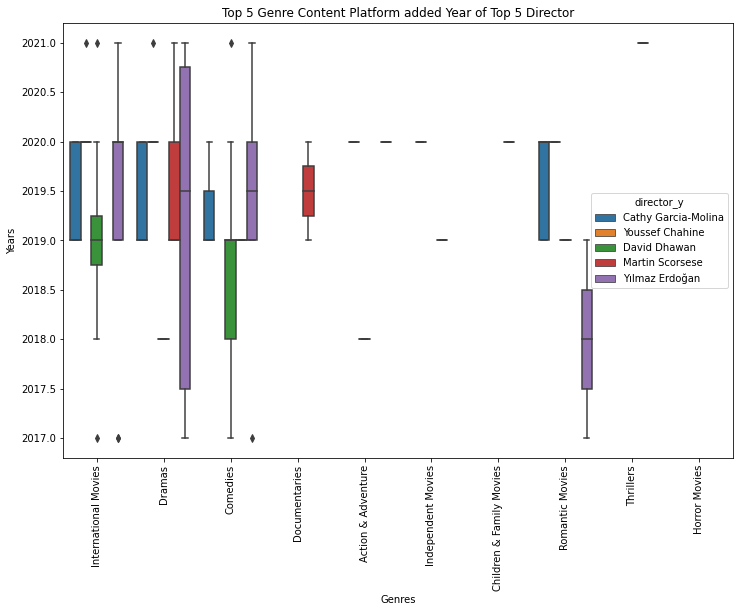

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_merge_genre_director, x='genre', y='year_added', hue="director_y", hue_order=df_merge_genre_director['director_y'].value_counts().index[:5], order=df_merge_genre_director['genre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 5 Genre Content Platform added Year of Top 5 Director')
plt.xlabel('Genres')
plt.ylabel('Years')
plt.show()

In above image we can see top 5 directors (by title count) and there prefferd genres. Like Cathy garcia made content in internation movies, drama and romamtic and devid dhawan made only comedy movies and martin scorsese made movies in drama and documentary genres. <br> And We can also clearly see the top directors (by title count) dont make Horror and Action & Adventure genres content on platform

**<h4> Conclusions </h4>**

*  Most Of Content Availabe on platform is of type movies almost 70% or 6000+.
*  US, India and UK is Leading Countries On platform as per title counts.
*  Anupam Kher and Rajiv Chilaka is top actor and director as per title counts.
*  February and May Month less liky to add a movie or tv show on platform.
*  Most of the content on platform added after 2014 and afterwords plat have repidly extanded and on avarage content on platform have increased 5 times.
*  Movies and TV Show both have significant portion content for mature audiances and after that highest number of both type content is mode for audiances age fourteen.
*  50% of movies have duration of 100 minutes and TV shows with season count two. there are few movies with 200+ minutes duration and TV shows with 10+ seasons on platform.
*  platform has rapid increase in both type of content (Movies and TV shows) from 2014. but OTT Platform is clearly focused more on movies as movies is far more then TV shows.
*  Also we can notice a slite drop in content adding after 2018. however drop in movies is more then TV shows.
*  Most Content both type (Movies and TV Show) have been added to platform 4 to 5 year after release. In some case movie is released in far 1990 and added to OTT Platform in 2010.
*  In recent year we can see TV shows added to OTT Platform same year of there release.
*  Top 3 Countries as per title count have content in all top 10 genres. UK have fewer content on some genres
*  US and UK Movies Duration is approx 100 minutes where indian movies have rum time of 120 to 150 minutes.
*  Also india does not have any TV show for top 10 genre as per title count.
*  Documentary movies duration is short in india campare to US and UK.
*  Before 2014 Most Content Availabe on platform is from Drama or Comedy genres and duration was less in 150 minutes.
*  top 5 directors (by title count) and there prefferd genres. Like Cathy garcia made content in internation movies, drama and romamtic and devid dhawan made only comedy movies and martin scorsese made movies in drama and documentary genres. <br> And We can also clearly see the top directors (by title count) dont make Horror and Action & Adventure genres content on platform.










